In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
import os

path = "DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train/"
files = os.listdir(path)[:3]
print(files)

classes = {'character_10_ka':0,'character_11_kha':1,'character_12_ga':2}

['character_10_ka', 'character_11_kha', 'character_12_ga']


In [53]:
import cv2

X = []
Y = []
for c in classes:
    dr = path + c
    for d_name in os.listdir(dr):
        img = cv2.imread(dr+"/"+d_name,0)
        X.append(img)
        Y.append(classes[c])
        

In [54]:
#print(type(X))
#print(X)
X = np.array(X)
#df = pd.DataFrame(X)
#df.head()
Y = np.array(Y)
#print(Y)
#print(type(X))

1


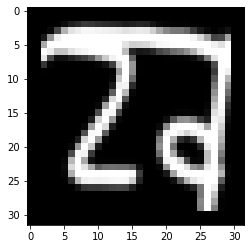

In [55]:
plt.imshow(X[1736],cmap="gray")
print(Y[1736])

In [56]:
print(len(X))
print(X.shape)
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

5100
(5100, 32, 32)
(5100, 1024)
(5100,)


In [57]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(5100, 32, 32)
3
2


In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(X_new,Y,test_size=.20,random_state=10)

In [59]:
import copy 
x_copy = copy.deepcopy(xtest)
y_copy = copy.deepcopy(ytest)
print(x_copy.shape)

(1020, 1024)


In [60]:
print(xtest.shape)
print(xtrain.shape)

(1020, 1024)
(4080, 1024)


In [61]:
print(xtrain.max())
print(xtest.max())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max())
print(xtest.max())

255
255
1.0
1.0


(4080, 256) (1020, 256)
256
1024
0


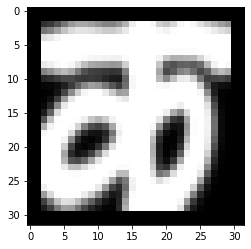

In [62]:
from sklearn.decomposition import PCA
from matplotlib.pyplot import imread
##plt.imshow(X[1736],cmap='gray')
#
##def transform(percentage):
##    percentage = percentage/100
##    kha_pca = PCA(n_components=percentage).fit(X[1736])
##    transformed = kha_pca.transform(X[1736])
##    projection = kha_pca.inverse_transform(transformed)
##    plt.imshow(projection,cmap='gray')
##
##percentage = 99
##transform(percentage)

pca = PCA(n_components = 256)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
print(xtrain.shape,xtest.shape)
print(pca.n_components)
print(pca.n_features_)

plt.imshow(X[0],cmap="gray")
print(Y[0])


In [63]:
ytest[:10]

array([1, 0, 0, 1, 2, 0, 1, 0, 0, 1])

In [64]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

class LogisticRegressionScratch():
    
    def __init__(self,lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.bias = None
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.w = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            pred = np.dot(X,self.w) + self.bias
            predictions = sigmoid(pred)
            
            dw = (1/n_samples) * np.dot(X.T , (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)
            
            self.w = self.w - self.lr * dw
            self.bias = self.bias - self.lr * db
            
    def predict(self,X):
        linear_pred = np.dot(X, self.w) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [65]:
model = LogisticRegressionScratch()
model.fit(xtrain,ytrain)

In [66]:
logReg = LogisticRegression(C=10,random_state=0)
logReg.fit(xtrain,ytrain)

C:\Users\hardi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=0)

In [67]:
skpred_train = logReg.predict(xtrain)
skpred_test = logReg.predict(xtest)

pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

In [68]:
print("Train Score for SkLearn",accuracy_score(ytrain,skpred_train))
print("Test score for SkLearn",accuracy_score(ytest,skpred_test))

print()
print("Train Score for Scratch Logistic Regression",accuracy_score(ytrain,pred_train))
print("Test score for Scratch Logistic Regression",accuracy_score(ytest,pred_test))
print(xtest.shape)

Train Score for SkLearn 0.9870098039215687
Test score for SkLearn 0.9284313725490196

Train Score for Scratch Logistic Regression 0.5651960784313725
Test score for Scratch Logistic Regression 0.5588235294117647
(1020, 256)


In [69]:
import joblib as jbl
import cv2
import copy 
jbl.dump(logReg,"DevnagariLogistic.pkl")

['DevnagariLogistic.pkl']

In [70]:
#rnge = [1,2,3,4,5,6,7,8,9,10]
#training = np.asarray(accuracy_score(ytrain,pred_train))
#testing =                    
#plt.plot(rnge,accuracy_score(ytest,pred_test), label = 'Testing Accuracy')
#plt.plot(rnge,accuracy_score(ytrain,pred_train), label = 'Training Accuracy')
#plt.legend()
#plt.ylabel('Accuracy')
#plt.show()

1


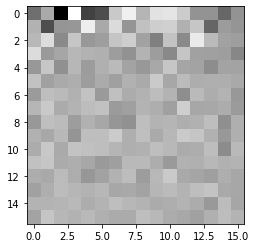

In [71]:
plt.imshow(xtest[0].reshape(16,16),cmap='gray')
print(ytest[0])

1


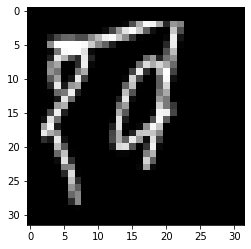

In [72]:
plt.imshow(x_copy[0].reshape(32,32),cmap='gray')
print(y_copy[0])

Logistic Regression From Scratch
CPU times: total: 266 ms
Wall time: 601 ms


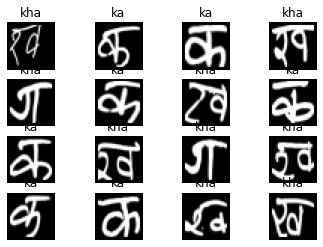

In [73]:
%%time
test_data = {0:'ka',1:'kha',2:'ga'}



print("Logistic Regression From Scratch")
for ts in range(16):
    
    plt.subplot(4,4,ts+1)
    plt.imshow(x_copy[ts].reshape(32,32),cmap='gray')
    plt.title(test_data[pred_test[ts]])
    plt.axis('off')
    


Logistic Regression From SkLearn
CPU times: total: 141 ms
Wall time: 133 ms


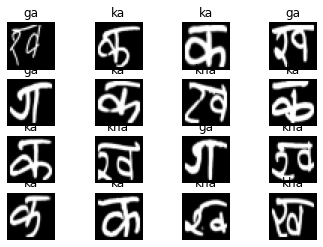

In [74]:
%%time
print("Logistic Regression From SkLearn")
for ts in range(16):
    
    plt.subplot(4,4,ts+1)
    plt.imshow(x_copy[ts].reshape(32,32),cmap='gray')
    plt.title(test_data[skpred_test[ts]])
    plt.axis('off')

[[323  25   0]
 [ 84 247   0]
 [  9 332   0]]
0.9284313725490196


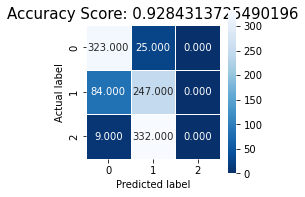

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(ytest, pred_test)
print(cm)
score = logReg.score(xtest, ytest)
print(score)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);